## AutoScout Car Price Prediction Capstone Project

AutoScout Car Price Prediction is my capstone project in data analysis and data visualization that aims to predict car prices based on various features. The project uses data scraped from an online car trading company's website in 2022, containing information about 13 different car makes and 594 models. 

The project is divided into three main parts: data cleaning, data imputation, and handling outliers using visualization libraries. The first part involves cleaning the data by dealing with incorrect headers, formats, anomalies, and dropping useless columns. The second part focuses on filling in missing values and converting categorical data to numeric data through encoding. Finally, in the third part, outliers in the data are identified and handled through the use of visualization libraries, allowing for valuable insights to be extracted.

The project utilizes a variety of commonly used algorithms in data cleaning and exploratory data analysis, including Python libraries such as Numpy, Pandas, Matplotlib, Seaborn, and Scipy. With a clean dataset in hand, the project then moves on to predictive modeling using machine learning techniques.

Overall, AutoScout Car Price Prediction is an innovative project that demonstrates the power of data analysis and visualization in making predictions and gaining insights. It has practical applications for the automotive industry and showcases the importance of data-driven decision making.

### Part-1 Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from langdetect import detect
from googletrans import Translator

In [2]:
df = pd.read_json('C:/Users/ihsankoo/Desktop/Clarusway/Data Science/Car price prediction capstone project/as24_cars.json')

In [3]:
df.shape

(29480, 58)

In [4]:
df.head()

,make_model,short_description,make,model,location,price,Body type,Type,Doors,Country version,...,CO₂-efficiency,Fuel consumption (WLTP),CO₂-emissions (WLTP),Available from,Taxi or rental car,Availability,Last timing belt change,Electric Range (WLTP),Power consumption (WLTP),Battery Ownership
0,Mercedes-Benz A 160,CDi,\nMercedes-Benz\n,"[\n, A 160 ,\n]","P.I. EL PALMAR C/FORJA 6, 11500 PUERTO DE SAN...","€ 16,950.-","[\n, Compact, \n]","[\n, Used, \n]","[\n, 5, \n]","[\n, Spain, \n]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Mercedes-Benz EQE 350,350+,\nMercedes-Benz\n,"[\n, EQE 350 ,\n]","APARTADO DE CORREOS 1032, 26140 LOGROÑO, ES","€ 80,900.-","[\n, Compact, \n]","[\n, Pre-registered, \n]","[\n, 4, \n]","[\n, Spain, \n]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mercedes-Benz A 45 AMG,S 4Matic+ 8G-DCT,\nMercedes-Benz\n,"[\n, A 45 AMG ,\n]","PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8...","€ 69,900.-","[\n, Compact, \n]","[\n, Used, \n]","[\n, 5, \n]","[\n, Spain, \n]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Mercedes-Benz A 35 AMG,4Matic+ 7G-DCT,\nMercedes-Benz\n,"[\n, A 35 AMG ,\n]","Carrer de Provença, 31 Local, 8029 BARCELONA, ES","€ 46,990.-","[\n, Compact, \n]","[\n, Used, \n]","[\n, 5, \n]","[\n, Spain, \n]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Mercedes-Benz A 45 AMG,200CDI BE Line 4M 7G-DCT,\nMercedes-Benz\n,"[\n, A 45 AMG ,\n]","CARRIL ARAGONES 4, 30007 CASILLAS, ES","€ 16,800.-","[\n, Compact, \n]","[\n, Used, \n]","[\n, 5, \n]","[\n, Spain, \n]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.sample(5)

,make_model,short_description,make,model,location,price,Body type,Type,Doors,Country version,...,CO₂-efficiency,Fuel consumption (WLTP),CO₂-emissions (WLTP),Available from,Taxi or rental car,Availability,Last timing belt change,Electric Range (WLTP),Power consumption (WLTP),Battery Ownership
0,Mercedes-Benz A 160,CDi,\nMercedes-Benz\n,"[\n, A 160 ,\n]","P.I. EL PALMAR C/FORJA 6, 11500 PUERTO DE SAN...","€ 16,950.-","[\n, Compact, \n]","[\n, Used, \n]","[\n, 5, \n]","[\n, Spain, \n]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Mercedes-Benz EQE 350,350+,\nMercedes-Benz\n,"[\n, EQE 350 ,\n]","APARTADO DE CORREOS 1032, 26140 LOGROÑO, ES","€ 80,900.-","[\n, Compact, \n]","[\n, Pre-registered, \n]","[\n, 4, \n]","[\n, Spain, \n]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mercedes-Benz A 45 AMG,S 4Matic+ 8G-DCT,\nMercedes-Benz\n,"[\n, A 45 AMG ,\n]","PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8...","€ 69,900.-","[\n, Compact, \n]","[\n, Used, \n]","[\n, 5, \n]","[\n, Spain, \n]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Mercedes-Benz A 35 AMG,4Matic+ 7G-DCT,\nMercedes-Benz\n,"[\n, A 35 AMG ,\n]","Carrer de Provença, 31 Local, 8029 BARCELONA, ES","€ 46,990.-","[\n, Compact, \n]","[\n, Used, \n]","[\n, 5, \n]","[\n, Spain, \n]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Mercedes-Benz A 45 AMG,200CDI BE Line 4M 7G-DCT,\nMercedes-Benz\n,"[\n, A 45 AMG ,\n]","CARRIL ARAGONES 4, 30007 CASILLAS, ES","€ 16,800.-","[\n, Compact, \n]","[\n, Used, \n]","[\n, 5, \n]","[\n, Spain, \n]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.info()

,make_model,short_description,make,model,location,price,Body type,Type,Doors,Country version,...,CO₂-efficiency,Fuel consumption (WLTP),CO₂-emissions (WLTP),Available from,Taxi or rental car,Availability,Last timing belt change,Electric Range (WLTP),Power consumption (WLTP),Battery Ownership
1889,Mercedes-Benz C 220,d T 9G AMG*NightP*Stdhzg*Digital-Light*AHK*,\nMercedes-Benz\n,"[\n, C 220 ,\n]","Nürnberger Straße 131b, 97076 Würzburg, DE","€ 51,900.-","[\n, Station wagon, \n]","[\n, Demonstration, \n]","[\n, 5, \n]","[\n, Germany, \n]",...,Calculated on basis of measured CO₂-emissions ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
384,Mercedes-Benz A 200,200d,\nMercedes-Benz\n,"[\n, A 200 ,\n]","Avenida de la Cerrada, Carretera Santander-Bil...","€ 20,841.-","[\n, Compact, \n]","[\n, Used, \n]","[\n, 5, \n]","[\n, Spain, \n]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
353,Mercedes-Benz A 180,180d 7G-DCT,\nMercedes-Benz\n,"[\n, A 180 ,\n]","C/ DE ARGANZA,1, 28947 FUENLABRADA, ES","€ 23,490.-","[\n, Compact, \n]","[\n, Used, \n]","[\n, 5, \n]","[\n, Spain, \n]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13363,SEAT Leon,ST 1.6 TDI 110cv St&Sp Style Ecomotive,\nSEAT\n,"[\n, Leon ,\n]","Ctra. del Mig, 96,, 08097 L'Hospitalet de Llo...","€ 12,990.-","[\n, Station wagon, \n]","[\n, Used, \n]","[\n, 5, \n]","[\n, Spain, \n]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26080,Volvo V40,D2 Momentum 120,\nVolvo\n,"[\n, V40 ,\n]","POLÍGONO LANDAZABAL CALLE A 38, 31610 VILLAVA...","€ 15,136.-","[\n, Compact, \n]","[\n, Used, \n]","[\n, 5, \n]","[\n, Spain, \n]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Creating a copy of the original dataframe in order to keep the original data safe
df0 = df.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29480 entries, 0 to 29479
Data columns (total 58 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   make_model                28630 non-null  object 
 1   short_description         28630 non-null  object 
 2   make                      28630 non-null  object 
 3   model                     28630 non-null  object 
 4   location                  28630 non-null  object 
 5   price                     28630 non-null  object 
 6   Body type                 28630 non-null  object 
 7   Type                      28630 non-null  object 
 8   Doors                     28271 non-null  object 
 9   Country version           16889 non-null  object 
 10  Offer number              23100 non-null  object 
 11  Warranty                  15784 non-null  object 
 12  Mileage                   28629 non-null  object 
 13  First registration        28628 non-null  object 
 14  Gearbo

In [8]:
df.isnull().sum()

In [9]:
# Looking at the missing value percentage in the columns of dataset
(df.isnull().sum()/df.shape[0] * 100).T

make_model                    2.883311
short_description             2.883311
make                          2.883311
model                         2.883311
location                      2.883311
price                         2.883311
Body type                     2.883311
Type                          2.883311
Doors                         4.101085
Country version              42.710312
Offer number                 21.641791
Warranty                     46.458616
Mileage                       2.886703
First registration            2.890095
Gearbox                       3.724559
Fuel type                     8.945047
Colour                        8.731343
Paint                        50.831072
desc                          4.860923
seller                        2.883311
Seats                        13.483718
Power                         4.823609
Engine size                   7.642469
Gears                        35.705563
CO₂-emissions                36.926730
Manufacturer colour      

In [10]:
# Here are the columns which have more than 20% of missing values. I'll decide what to do with them later.
df.isnull().sum()[df.isnull().sum()/df.shape[0] > 0.2].index

make_model                    2.883311
short_description             2.883311
make                          2.883311
model                         2.883311
location                      2.883311
price                         2.883311
Body type                     2.883311
Type                          2.883311
Doors                         4.101085
Country version              42.710312
Offer number                 21.641791
Warranty                     46.458616
Mileage                       2.886703
First registration            2.890095
Gearbox                       3.724559
Fuel type                     8.945047
Colour                        8.731343
Paint                        50.831072
desc                          4.860923
seller                        2.883311
Seats                        13.483718
Power                         4.823609
Engine size                   7.642469
Gears                        35.705563
CO₂-emissions                36.926730
Manufacturer colour      

In [11]:
# Another way to look at the missing values, this time visually
def show_nulls(data):
    plt.figure(figsize=(10, 5))

    sns.displot(data=data.isnull().melt(value_name="missing"),
                y="variable",
                hue="missing",
                multiple="fill",
                height=9.25)

    plt.axvline(0.2, color="r")
    plt.show()

Index(['Country version', 'Offer number', 'Warranty', 'Paint', 'Gears',
       'CO₂-emissions', 'Manufacturer colour', 'Drivetrain', 'Cylinders',
       'Fuel consumption', '\nExtras\n', 'Empty weight', 'Model code',
       'General inspection', 'Last service', 'Full service history',
       'Non-smoker vehicle', 'Emission class', 'Emissions sticker',
       'Upholstery colour', 'Upholstery', 'Production date', 'Previous owner',
       'Other fuel types', 'Power consumption', 'Energy efficiency class',
       'CO₂-efficiency', 'Fuel consumption (WLTP)', 'CO₂-emissions (WLTP)',
       'Available from', 'Taxi or rental car', 'Availability',
       'Last timing belt change', 'Electric Range (WLTP)',
       'Power consumption (WLTP)', 'Battery Ownership'],
      dtype='object')

In [13]:
def show_nulls(data):
    plt.figure(figsize=(10, 5))

    sns.displot(data=data.isnull().melt(value_name="missing"),
                y="variable",
                hue="missing",
                multiple="fill",
                height=9.25)

    plt.axvline(0.2, color="r")
    plt.show()

<Figure size 720x360 with 0 Axes>

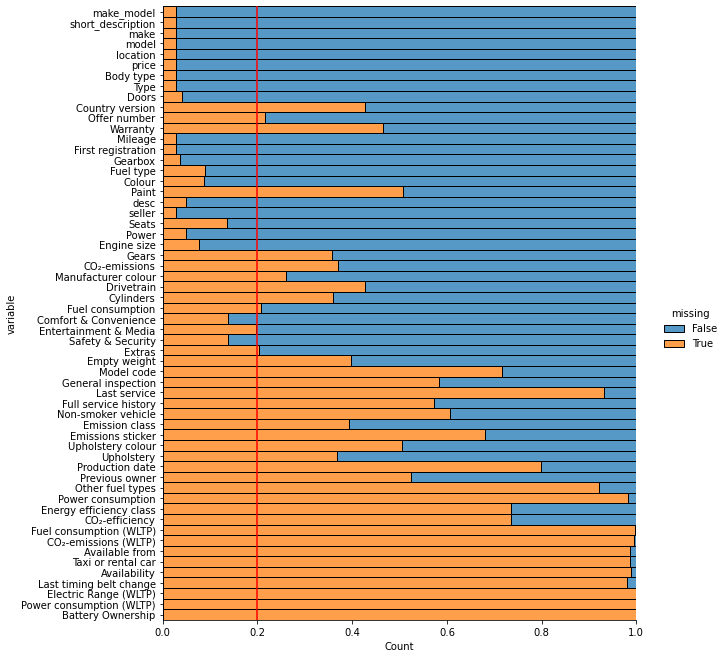

In [14]:
show_nulls(df)

<Figure size 720x360 with 0 Axes>

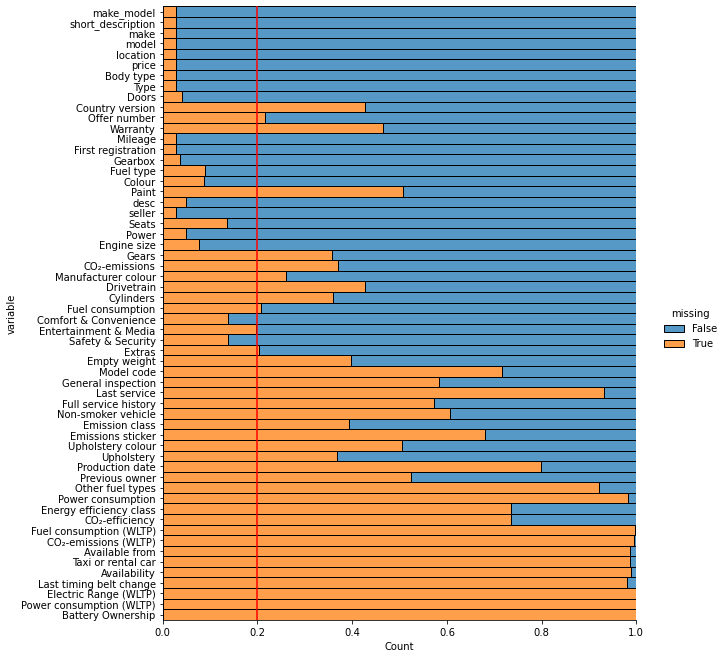

In [15]:
# I'll drop columns which have more than 90% of missing values.

df.drop(columns=df.isnull().sum()[df.isnull().sum()/df.shape[0] > 0.9].index, inplace=True)

In [16]:
df.shape

In [17]:
df.dropna(axis=0, how='all')

(29480, 46)

In [18]:
# Remove the leading and trailing spaces

def remove_white(x):
    return list(filter(lambda x: x.strip(), x))
df['desc'] = df['desc'].apply(lambda x: remove_white(x) if isinstance(x, list) else x)

,make_model,short_description,make,model,location,price,Body type,Type,Doors,Country version,...,Full service history,Non-smoker vehicle,Emission class,Emissions sticker,Upholstery colour,Upholstery,Production date,Previous owner,Energy efficiency class,CO₂-efficiency
0,Mercedes-Benz A 160,CDi,\nMercedes-Benz\n,"[\n, A 160 ,\n]","P.I. EL PALMAR C/FORJA 6, 11500 PUERTO DE SAN...","€ 16,950.-","[\n, Compact, \n]","[\n, Used, \n]","[\n, 5, \n]","[\n, Spain, \n]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Mercedes-Benz EQE 350,350+,\nMercedes-Benz\n,"[\n, EQE 350 ,\n]","APARTADO DE CORREOS 1032, 26140 LOGROÑO, ES","€ 80,900.-","[\n, Compact, \n]","[\n, Pre-registered, \n]","[\n, 4, \n]","[\n, Spain, \n]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mercedes-Benz A 45 AMG,S 4Matic+ 8G-DCT,\nMercedes-Benz\n,"[\n, A 45 AMG ,\n]","PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8...","€ 69,900.-","[\n, Compact, \n]","[\n, Used, \n]","[\n, 5, \n]","[\n, Spain, \n]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Mercedes-Benz A 35 AMG,4Matic+ 7G-DCT,\nMercedes-Benz\n,"[\n, A 35 AMG ,\n]","Carrer de Provença, 31 Local, 8029 BARCELONA, ES","€ 46,990.-","[\n, Compact, \n]","[\n, Used, \n]","[\n, 5, \n]","[\n, Spain, \n]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Mercedes-Benz A 45 AMG,200CDI BE Line 4M 7G-DCT,\nMercedes-Benz\n,"[\n, A 45 AMG ,\n]","CARRIL ARAGONES 4, 30007 CASILLAS, ES","€ 16,800.-","[\n, Compact, \n]","[\n, Used, \n]","[\n, 5, \n]","[\n, Spain, \n]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29474,Volvo S90,T8 Twin Business Plus AWD Aut.,\nVolvo\n,"[\n, S90 ,\n]","HERMANOS LUMIERE Nº16, 29004 MALAGA, ES","€ 37,600.-","[\n, Sedan, \n]","[\n, Used, \n]","[\n, 4, \n]","[\n, Spain, \n]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29475,Volvo S40,2.4i Momentum/ Airco/ NAP/ APK/ Elek. Ramen,\nVolvo\n,"[\n, S40 ,\n]","Stobbeweg 6, 2461 EX TER AAR, NL","€ 5,499.-","[\n, Sedan, \n]","[\n, Used, \n]","[\n, 4, \n]",NaN,...,Yes,NaN,Euro 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29476,Volvo C30,1.6 D DRIVe Start/Stop R-design,\nVolvo\n,"[\n, C30 ,\n]","Sur rendez-vous, 5060 Sambreville, BE","€ 7,300.-","[\n, Sedan, \n]","[\n, Used, \n]","[\n, 3, \n]","[\n, Belgium, \n]",...,Yes,NaN,Euro 5,NaN,Black,NaN,NaN,"[[96,000 km, 04/2011], 1]",NaN,NaN
29477,Volvo S90,T5 AUT(8) MOMENTUM BUSINESS SCHUIFDAK 360GR CA...,\nVolvo\n,"[\n, S90 ,\n]","Bergambachterstraat 5, 2871 JB SCHOONHOVEN, NL","€ 29,900.-","[\n, Sedan, \n]","[\n, Used, \n]","[\n, 4, \n]",NaN,...,Yes,NaN,Euro 6,NaN,Other,Full leather,NaN,NaN,NaN,NaN


In [19]:
from textblob import TextBlob

In [20]:
# Return the language code of the text

def language_detection(x):
    try:
        blob=TextBlob(x)
        return blob.language_detection()
    except: 
        return np.nan
    
# Translate the text to English

def translate(x,from_lang):
    try:
        blob=TextBlob(x)
        return blob.translate(from_lang=from_lang, to='en').string
    except: 
        return np.nan

In [21]:
# 'desc_lang' is the detected language code for each string in the 'desc' column

# def language_detection_2(text):
#     try:
#         lang = detect(text)
#         return lang
#     except:
#         return np.nan
# df['desc_lang'] = df.desc.apply(lambda x: language_detection_2(' @@ '.join(x)) if isinstance(x, list) else x)
# @@ separator is an unlikely combination of characters to appear in natural language text. 
# This helps to prevent the language detection algorithm from being confused by the presence of multiple languages in a single string.

In [22]:
# df['desc_en'] = df.loc[:,['desc','desc_lang']].apply(lambda x: translate(x.desc,x.desc_lang), axis =1)

In [23]:
changed_column_names = {col: col.lower().replace('\n', '').replace('&', '').replace('co₂', 'co2').replace('-', '_').replace(' ', '_').replace('__', '_').replace('(', '').replace(')', '') for col in df.columns}
changed_column_names

# Renaming the columns to make them more readable

In [24]:
df = df.rename(columns=changed_column_names)
df.columns

{'make_model': 'make_model',
 'short_description': 'short_description',
 'make': 'make',
 'model': 'model',
 'location': 'location',
 'price': 'price',
 'Body type': 'body_type',
 'Type': 'type',
 'Doors': 'doors',
 'Country version': 'country_version',
 'Offer number': 'offer_number',
 'Warranty': 'warranty',
 'Mileage': 'mileage',
 'First registration': 'first_registration',
 'Gearbox': 'gearbox',
 'Fuel type': 'fuel_type',
 'Colour': 'colour',
 'Paint': 'paint',
 'desc': 'desc',
 'seller': 'seller',
 'Seats': 'seats',
 'Power': 'power',
 'Engine size': 'engine_size',
 'Gears': 'gears',
 'CO₂-emissions': 'co2_emissions',
 'Manufacturer colour': 'manufacturer_colour',
 'Drivetrain': 'drivetrain',
 'Cylinders': 'cylinders',
 'Fuel consumption': 'fuel_consumption',
 '\nComfort & Convenience\n': 'comfort_convenience',
 '\nEntertainment & Media\n': 'entertainment_media',
 '\nSafety & Security\n': 'safety_security',
 '\nExtras\n': 'extras',
 'Empty weight': 'empty_weight',
 'Model code': '

In [25]:
df.sample(10)

Index(['make_model', 'short_description', 'make', 'model', 'location', 'price',
       'body_type', 'type', 'doors', 'country_version', 'offer_number',
       'warranty', 'mileage', 'first_registration', 'gearbox', 'fuel_type',
       'colour', 'paint', 'desc', 'seller', 'seats', 'power', 'engine_size',
       'gears', 'co2_emissions', 'manufacturer_colour', 'drivetrain',
       'cylinders', 'fuel_consumption', 'comfort_convenience',
       'entertainment_media', 'safety_security', 'extras', 'empty_weight',
       'model_code', 'general_inspection', 'full_service_history',
       'non_smoker_vehicle', 'emission_class', 'emissions_sticker',
       'upholstery_colour', 'upholstery', 'production_date', 'previous_owner',
       'energy_efficiency_class', 'co2_efficiency'],
      dtype='object')

In [26]:
df.make = df.make.str.strip('\n')
df.loc[df.make == 'SEAT','make'] = 'Seat'
df = df.reset_index(drop=True)

,make_model,short_description,make,model,location,price,body_type,type,doors,country_version,...,full_service_history,non_smoker_vehicle,emission_class,emissions_sticker,upholstery_colour,upholstery,production_date,previous_owner,energy_efficiency_class,co2_efficiency
19734,Nissan 370Z,3.7 V6 Pack,\nNissan\n,"[\n, 370Z ,\n]","8525ex De Fryske Marren, NL","€ 18,950.-","[\n, Convertible, \n]","[\n, Used, \n]","[\n, 2, \n]",NaN,...,NaN,NaN,Euro 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1695,Mercedes-Benz CLA 180,SB AMG line*Led*Navi*,\nMercedes-Benz\n,"[\n, CLA 180 ,\n]","Steenkaaistraat 1, 9200 Dendermonde, BE","€ 25,250.-","[\n, Station wagon, \n]","[\n, Used, \n]","[\n, 4, \n]",NaN,...,Yes,Yes,Euro 6,NaN,Black,Part leather,NaN,"[[50,000 km, 03/2017], 1]",NaN,NaN
26215,Volvo C30,D5 Momentum Geartronic,\nVolvo\n,"[\n, C30 ,\n]","VALLE DE TORMES 2 LOCAL 4, 28660 BOADILLA DEL...","€ 6,489.-","[\n, Compact, \n]","[\n, Used, \n]","[\n, 3, \n]","[\n, Spain, \n]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28590,Volvo V60,D3 Momentum-Pro Aut 18'' BLIS Navi LED Kamera,\nVolvo\n,"[\n, V60 ,\n]","Am Römerhof 15, 60486 Frankfurt am Main, DE","€ 33,850.-","[\n, Station wagon, \n]","[\n, Used, \n]","[\n, 5, \n]","[\n, Germany, \n]",...,Yes,Yes,Euro 6d-TEMP,4 (Green),Black,Part leather,NaN,"[[32,991 km, 06/2020], 1]",A+,Calculated on basis of measured CO₂-emissions ...
3580,Opel Astra,J 1.4 Turbo GTC Edition/Sport/18Zoll/Euro5,\nOpel\n,"[\n, Astra ,\n]","Lahnstraße 8, 35232 Friedensdorf, DE","€ 6,950.-","[\n, Coupe, \n]","[\n, Used, \n]","[\n, 2, \n]",NaN,...,NaN,NaN,Euro 5,4 (Green),NaN,NaN,NaN,"[[131,000 km, 12/2011], 2]",NaN,NaN
10919,Fiat 500X,1.0 T3 120cv Sport,\nFiat\n,"[\n, 500X ,\n]","Via Nazionale Per Donnas, 69, 11026 Pont Sain...","€ 24,400.-","[\n, Off-Road/Pick-up, \n]","[\n, Used, \n]","[\n, 5, \n]",NaN,...,NaN,NaN,Euro 6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19436,Nissan Qashqai,1.5 DCI ACENTA 5P,\nNissan\n,"[\n, Qashqai ,\n]","AVENIDA PISTA DE SILLA 46, 46470 MASSANASSA, ES","€ 18,800.-","[\n, Compact, \n]","[\n, Used, \n]","[\n, 5, \n]","[\n, Spain, \n]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3165,Opel Cascada,2.0 CDTI Automatik Innovation,\nOpel\n,"[\n, Cascada ,\n]","64839 Münster (Hessen), DE","€ 14,000.-","[\n, Convertible, \n]","[\n, Used, \n]","[\n, 2, \n]",NaN,...,Yes,Yes,Euro 5,4 (Green),Beige,Full leather,NaN,"[[100,000 km, 05/2015], 1]",NaN,NaN
3477,Opel Calibra,"2,0i",\nOpel\n,"[\n, Calibra ,\n]","6841 Mäder, AT","€ 1,500.-","[\n, Coupe, \n]","[\n, Used, \n]","[\n, 3, \n]",NaN,...,NaN,NaN,NaN,NaN,NaN,Other,NaN,NaN,NaN,NaN
22482,Ford Mustang,5.0 Ti-VCT V8 307kW GT A.(Fast.),\nFord\n,"[\n, Mustang ,\n]","CALLE GALILEO GALILEI 29, 28806 ALCALA DE HEN...","€ 42,900.-","[\n, Coupe, \n]","[\n, Used, \n]","[\n, 2, \n]","[\n, Spain, \n]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
# Drop rows with missing values in 'make_model' column
df.dropna(subset=['make_model'], inplace=True)

# Replace 'SEAT' with 'Seat' in 'make_model' column
df.loc[df.make_model.str.contains('SEAT'), 'make_model'] = df.loc[df.make_model.str.contains('SEAT'), 'make_model'].apply(lambda x: x.replace('SEAT', 'Seat'))


In [28]:
df.loc[df.make_model.str.contains('TUCSON'),'make_model'] = df.loc[df.make_model.str.contains('TUCSON'),'make_model'].apply(lambda x: x.replace('TUCSON','Tucson'))

In [29]:
df.make_model.value_counts().to_excel('make_model.xlsx')

In [30]:
# Clean columns

for i in df.columns:
    df[i] = df[i].astype(str).str.replace(r"\[|\\n|\]", "")

C:\Users\ihsankoo\AppData\Local\Temp\ipykernel_5276\3700334830.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df[i] = df[i].astype(str).str.replace(r"\[|\\n|\]", "")


In [31]:
df.sample(5)

,make_model,short_description,make,model,location,price,body_type,type,doors,country_version,...,full_service_history,non_smoker_vehicle,emission_class,emissions_sticker,upholstery_colour,upholstery,production_date,previous_owner,energy_efficiency_class,co2_efficiency
3017,Opel,Cabrio 1.4T S&S Excellence,\nOpel\n,"', ,'","CTRA. DE CAMION, KM. 311, 13005 CIUDAD REAL, ES","€ 17,009.-","', Convertible, '","', Used, '","', 2, '","', Spain, '",...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
6187,Renault Captur,ZEN TCe 90,\nRenault\n,"', Captur ,'","Edisonstr. 6, 48432 Rheine, DE","€ 20,989.-","', Off-Road/Pick-up, '","', Demonstration, '","', 4, '","', Germany, '",...,nan,nan,Euro 6d-TEMP,4 (Green),Black,Cloth,nan,"'3,568 km', '12/2021', '1'",B,Calculated on basis of measured CO₂-emissions ...
16715,Dacia Lodgy,Stepway Comf. 1.5 dCi,\nDacia\n,"', Lodgy ,'","Kärntner Straße 36, 9900 Lienz, AT","€ 24,900.-","', Sedan, '",""", Employee's car, ""","', 5, '","', Czechia, '",...,nan,nan,nan,nan,nan,Cloth,2022.0,"'81 km', '05/2022', '1'",nan,nan
2813,Opel Cascada,Innovation Bi-XENON SHZ LHZ PDC v.+h. TEMPOMAT...,\nOpel\n,"', Cascada ,'","Rheinberger Str. 193-195, 47445 Moers, DE","€ 13,690.-","', Convertible, '","', Used, '","', 3, '",nan,...,Yes,Yes,Euro 5,nan,nan,Cloth,2013.0,"'67,192 km', '07/2013', '2'",nan,nan
7083,Renault Grand Modus,Dynamique 1Hand schekheft gepflegt,\nRenault\n,"', Grand Modus ,'","Friedenstraße 25, 46045 Oberhausen, DE","€ 6,490.-","', Sedan, '","', Used, '","', 5, '",nan,...,Yes,Yes,Euro 5,4 (Green),Black,Cloth,nan,"'70,000 km', '02/2012', '1'",nan,nan


In [32]:
# Clean paint column
df.loc[~(df.paint == 'Metallic') & (df.manufacturer_colour.str.lower().str.contains('metallic')),['paint']] = 'Metallic'

In [33]:
df.loc[(df.paint == 'Metallic') & ~(df.manufacturer_colour.str.lower().str.contains('metallic', na=False)),['paint','manufacturer_colour']]

,paint,manufacturer_colour
0,Metallic,nan
4,Metallic,nan
7,Metallic,Gris Montaña
11,Metallic,Negro
15,Metallic,"Premium ""Kosmosschwarz""- Met"
...,...,...
29463,Metallic,Tropic Green
29467,Metallic,nan
29468,Metallic,nan
29471,Metallic,nan


In [34]:
# Clean horsepower column
df['hp'] = df['power'].str.extract(r'\((\d+) hp\)')

In [35]:
# CLEAN price column

df['price'].fillna(0, inplace=True)

df['price'] = df['price'].str.replace('€', '').str.replace('.', '').str.replace('-', '').str.replace(',', '').str.strip().astype(int)


C:\Users\ihsankoo\AppData\Local\Temp\ipykernel_5276\956737853.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = df['price'].str.replace('€', '').str.replace('.', '').str.replace('-', '').str.replace(',', '').str.strip().astype(int)


In [36]:
#CLEAN body_type column

df['body_type'] = df['body_type'].astype(str)

df.body_type = df.body_type.str.replace(r"[\'\\n,]", '').str.replace(r"[, \\n\']", '').str.strip()

C:\Users\ihsankoo\AppData\Local\Temp\ipykernel_5276\4288544108.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df.body_type = df.body_type.str.replace(r"[\'\\n,]", '').str.replace(r"[, \\n\']", '').str.strip()


In [37]:
#CLEAN type column

df['type'] = df['type'].astype(str)
df.type = df.type.str.replace(r"[\'\\n,]", '').str.replace(r"[, \\n\']", '').str.strip()


C:\Users\ihsankoo\AppData\Local\Temp\ipykernel_5276\1267451264.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df.type = df.type.str.replace(r"[\'\\n,]", '').str.replace(r"[, \\n\']", '').str.strip()


In [38]:
#CLEAN doors
df.doors = df.doors.astype(str)
df.doors = df.doors.str.replace(r"[\'\\n,]", '').str.replace(r"[, \\n\']", '').str.strip()


C:\Users\ihsankoo\AppData\Local\Temp\ipykernel_5276\3365011519.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df.doors = df.doors.str.replace(r"[\'\\n,]", '').str.replace(r"[, \\n\']", '').str.strip()


In [39]:
#CLEAN warranty
df.warranty = df.warranty.astype(str)
df.warranty = df.warranty.str.replace(r"[\'\\n,]", '').str.replace(r"[, \\n\']", '').str.replace('months', '').str.strip().astype(str)


C:\Users\ihsankoo\AppData\Local\Temp\ipykernel_5276\4003171663.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df.warranty = df.warranty.str.replace(r"[\'\\n,]", '').str.replace(r"[, \\n\']", '').str.replace('months', '').str.strip().astype(str)


In [40]:
# CLEAN mileage
df.mileage = df.mileage.astype(str)
df.mileage = df.mileage.str.replace('km','').str.replace(',','').str.strip()

In [41]:
# CLEAN first_registration
df['first_registration'] = pd.to_datetime(df['first_registration'], format='%m/%Y')

# MAKE AGE
df['age'] = 2022 - pd.to_datetime(df.first_registration).dt.year

In [42]:
# CLEAN gearbox
df.gearbox = df.gearbox.astype(str)
df.gearbox = df.gearbox.str.replace(r"[\'\\n]", '').str.replace(r"\\n\']", '').astype(str)


C:\Users\ihsankoo\AppData\Local\Temp\ipykernel_5276\253091023.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df.gearbox = df.gearbox.str.replace(r"[\'\\n]", '').str.replace(r"\\n\']", '').astype(str)


In [43]:
# CLEAN seats
df.seats = df.seats.astype(str)
df.seats = df.seats.str.replace(r"[\'\\n, ]", '').str.replace(r", \\n\']", '').astype(str)


C:\Users\ihsankoo\AppData\Local\Temp\ipykernel_5276\4023156090.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df.seats = df.seats.str.replace(r"[\'\\n, ]", '').str.replace(r", \\n\']", '').astype(str)


In [44]:
# CLEAN power TO-DO split kw and hp
df.power = df.power.astype(str)
df.power = df.power.str.replace(r"[\'\\n]", '').str.replace(r"\\n\']", '').astype(str)


C:\Users\ihsankoo\AppData\Local\Temp\ipykernel_5276\2142254127.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df.power = df.power.str.replace(r"[\'\\n]", '').str.replace(r"\\n\']", '').astype(str)


In [45]:
# CLEAN engine_size
df.engine_size = df.engine_size.astype(str)
df.engine_size = df.engine_size.str.replace(r"[\'\\n]", '').str.replace(r"\\n\']", '').str.replace(",", '').str.replace(r"cc", '').str.strip().astype(str)


C:\Users\ihsankoo\AppData\Local\Temp\ipykernel_5276\1236519107.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df.engine_size = df.engine_size.str.replace(r"[\'\\n]", '').str.replace(r"\\n\']", '').str.replace(",", '').str.replace(r"cc", '').str.strip().astype(str)


In [46]:
# CLEAN gears
df.gears = df.gears.astype(str)
df.gears = df.gears.str.replace(r"[\'\\n]", '').str.replace(r"\\n\']", '').str.strip()


C:\Users\ihsankoo\AppData\Local\Temp\ipykernel_5276\3606975945.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df.gears = df.gears.str.replace(r"[\'\\n]", '').str.replace(r"\\n\']", '').str.strip()


In [47]:
# CLEAN co2_emissions
df['co2_emissions'] = df['co2_emissions'].str.extract(r'(\d+(?:[.,]\d+)?)')
df.co2_emissions = df.co2_emissions.str.replace(',','')

In [48]:
# Clean drivetrain
df.drivetrain = df.drivetrain.astype(str)
df.drivetrain = df.drivetrain.str.replace(r"[\'\\n,]", '').str.replace(r"\\n\']", '').str.strip()


C:\Users\ihsankoo\AppData\Local\Temp\ipykernel_5276\1510540006.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df.drivetrain = df.drivetrain.str.replace(r"[\'\\n,]", '').str.replace(r"\\n\']", '').str.strip()


In [49]:
# Clean cylinders
df.cylinders = df.cylinders.astype(str)

df.cylinders = df.cylinders.str.replace(r"[\'\\n]", '').str.replace(r"\\n\']", '').str.strip()


C:\Users\ihsankoo\AppData\Local\Temp\ipykernel_5276\3149200853.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df.cylinders = df.cylinders.str.replace(r"[\'\\n]", '').str.replace(r"\\n\']", '').str.strip()


In [50]:
df.fuel_consumption.iloc[2]

"'8.4 l/100 km (comb.)', '10.9 l/100 km (city)', '5.8 l/100 km (country)'"

In [51]:
# CLEAN country_version
df.country_version = df.country_version.astype(str)
df.country_version = df.country_version.str.replace(r"\[|\\n|\]", "")


C:\Users\ihsankoo\AppData\Local\Temp\ipykernel_5276\1859484426.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df.country_version = df.country_version.str.replace(r"\[|\\n|\]", "")


In [52]:
# CLEAN offer_number
df.offer_number = df.offer_number.astype(str)
df.offer_number = df.offer_number.str.replace(r"[\'\n,]", '').str.strip().astype(str)


C:\Users\ihsankoo\AppData\Local\Temp\ipykernel_5276\340198464.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df.offer_number = df.offer_number.str.replace(r"[\'\n,]", '').str.strip().astype(str)


In [53]:
# CLEAN empty_weight
df.empty_weight = df.empty_weight.astype(str)
df.empty_weight = df.empty_weight.astype(str).str.replace(r"\[\'\\n", '').str.replace(r"kg\\n\'\]", '').str.replace(',','').str.strip().astype(str)

C:\Users\ihsankoo\AppData\Local\Temp\ipykernel_5276\3686520217.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df.empty_weight = df.empty_weight.astype(str).str.replace(r"\[\'\\n", '').str.replace(r"kg\\n\'\]", '').str.replace(',','').str.strip().astype(str)


In [54]:
import re

df['model'] = df['model'].apply(lambda x: re.sub(r"^'|'$|,", "", re.sub(r"'^,|,'$", "", x)))

# CLEAN model

In [55]:
df.sample(10)

,make_model,short_description,make,model,location,price,body_type,type,doors,country_version,...,emission_class,emissions_sticker,upholstery_colour,upholstery,production_date,previous_owner,energy_efficiency_class,co2_efficiency,hp,age
13421,Seat Leon,1.5 TSI DSG AAC SHZ PDC,\nSEAT\n,Leon,"Merziener Str. 10, 06366 Köthen, DE",19990,Seda,Used,5,"', Austria, '",...,Euro 6,4 (Green),Black,Cloth,nan,nan,B,Calculated on basis of measured CO₂-emissions ...,150,2.0
14212,Skoda Karoq,Sportline 2.0 TDI 4x4 DSG/AHK/PANO,\nSkoda\n,Karoq,"Im Herrmannshof 23, 91595 Burgoberbach, DE",28890,Off-Road/Pick-up,Used,5,"', Germany, '",...,Euro 6,4 (Green),Black,Cloth,nan,"'145,971 km', '12/2019', '1'",nan,nan,190,3.0
3015,Opel,Cabrio 1.4T S&S Excellence,\nOpel\n,,"Avda. Arquitecto Miguel Angel Beloqui 11, 300...",17009,Covertible,Used,2,"', Spain, '",...,nan,nan,nan,nan,nan,nan,nan,nan,140,5.0
17636,Toyota MR 2,1.8 VVT-i,\nToyota\n,MR 2,"CTRA. DE CAMION, KM. 311, 13005 CIUDAD REAL, ES",12800,Coupe,Used,2,"', Spain, '",...,nan,nan,nan,nan,nan,nan,nan,nan,140,19.0
11827,Fiat Panda,1100 i.e. cat 4x4 Trekking DA COLLEZIONE,\nFiat\n,Panda,"Via Verbano, 12, 20017 Rho - Milano, IT",11890,Seda,Used,3,"', Italy, '",...,Euro 3,nan,Blue,Cloth,nan,"'79,790 km', '11/2001', '1'",nan,nan,54,21.0
28932,Volvo V90 Cross Country,"AWD D4 EU6d-Temp,HeadUp,Schiebedach,Kamera,Key...",\nVolvo\n,V90 Cross Country,"Stockumer Str. 80, 58453 Witten, DE",36580,Statiowago,Used,5,"', Germany, '",...,Euro 6d-TEMP,nan,nan,Full leather,2018.0,"'62,326 km', '04/2018', '2'",A,Calculated on basis of measured CO₂-emissions ...,190,4.0
13559,Seat Ibiza,1.0 TGI S&S FR,\nSEAT\n,Ibiza,"Aschenhausweg 5, 74523 Schwäbisch Hall, DE",16390,Seda,Used,5,"', Germany, '",...,Euro 6d-TEMP,4 (Green),Black,Cloth,nan,"'20,000 km', '01/2020', '1'",A+,Calculated on basis of measured CO₂-emissions ...,90,2.0
1717,Mercedes-Benz C 43 AMG,Estate 4Matic 7G Plus,\nMercedes-Benz\n,C 43 AMG,"C.OPTICA Nº 1, 8150 PARETS DEL VALLES, ES",34990,Statiowago,Used,5,"', Spain, '",...,nan,nan,nan,nan,nan,nan,nan,nan,367,6.0
10903,Fiat 500X,My21 1.0 120cv Firefly Sport,\nFiat\n,500X,"Corso Francia,222, 10093 Collegno - TO, IT",25000,Off-Road/Pick-up,Pre-registered,5,nan,...,Euro 6d-TEMP,nan,nan,nan,nan,nan,nan,nan,120,0.0
9758,Fiat Punto Evo,0.9 TwinAir Lounge 5-Deurs Clima|LMV|Cruise|Bl...,\nFiat\n,Punto Evo,"Handelsweg-Noord 19-21, 8251 JS DRONTEN, NL",6850,Compact,Used,5,nan,...,Euro 6,nan,nan,nan,nan,nan,nan,nan,101,8.0


In [56]:
df['country_version'] = df0['Country version']

# I accidentally deleted the column, so I had to recreate it

In [57]:
df['country_version'].fillna('Unknown', inplace=True)

In [58]:
# Remove brackets and new line
df['country_version'] = df['country_version'].astype(str).str.replace(r"\[|\\n|\]", "")

C:\Users\ihsankoo\AppData\Local\Temp\ipykernel_5276\2337020259.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['country_version'] = df['country_version'].astype(str).str.replace(r"\[|\\n|\]", "")


In [59]:
# Remove single quotes and commas
df['country_version'] = df['country_version'].apply(lambda x: re.sub(r"^'|'$|,", "", re.sub(r"'^,|,'$", "", x)))

In [60]:
df.sample(3).T

,2564,2753,28210
make_model,Opel Corsa,Opel Astra,Volvo XC40
short_description,F 1.5 CDTI Elegance Panoramadach,1.4 Turbo Blitz Nieuwstaat! Origin 86Dkm !!,Inscription Expression Plug-In Hybrid 2WD T5 E...
make,\nOpel\n,\nOpel\n,\nVolvo\n
model,Corsa,Astra,XC40
location,"Mainzer Straße 20a, 55545 Bad Kreuznach, DE","Bedrijfsweg 13, 6541 DC NIJMEGEN, NL","Stockumer Str. 80, 58453 Witten, DE"
price,20500,9425,47330
body_type,Compact,Compact,Off-Road/Pick-up
type,Used,Used,Used
doors,4,5,5
country_version,Unknown,Unknown,Germany


In [61]:
df.model_code.nunique()

# There are 2,000+ model codes, so I will not clean them because we will not use them in our machine learning model.

,7248,18438,6366
make_model,Peugeot 108,Toyota Auris,Renault Captur
short_description,VTI 72 Stop&Start Top! Active,Touring Sports 1.8 Hybrid Dynamic Automaat I LUXE,1.2 TCe Dynamique Aut
make,\nPeugeot\n,\nToyota\n,\nRenault\n
model,108,Auris,Captur
location,"Otto-Lilienthal-Straße 54, 46539 Dinslaken, DE","Brinkhorst 7, 7207 BG ZUTPHEN, NL","Leidseweg 386, 2253 JN VOORSCHOTEN, NL"
price,13990,17900,11400
body_type,Compact,Statiowago,Off-Road/Pick-up
type,Used,Used,Used
doors,5,5,5
country_version,Germany,Unknown,Unknown


In [62]:
def first_looking(col):
    print("column name    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum()*100 / df.shape[0], 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].astype(str).nunique())
    print("--------------------------------")
    print(df[col].value_counts(dropna = False))

# I created a function to see the number of nulls, unique values, and the value counts of each column.

2187

In [63]:
first_looking('price')

In [64]:
df.price.sample(10)

column name    :  price
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  5021
--------------------------------
14990    222
12990    219
16990    186
19990    166
9990     160
        ... 
19112      1
30465      1
18461      1
22649      1
4440       1
Name: price, Length: 5021, dtype: int64


In [65]:
(df.price == 0).value_counts()

2810     23450
18691     7600
17256     3950
16118    24450
22560    87500
2382     23950
14400    32555
27545    55900
29381    19400
4395     26950
Name: price, dtype: int32

In [66]:
first_looking('make_model')

False    28630
Name: price, dtype: int64

In [67]:
first_looking('make')

column name    :  make_model
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  611
--------------------------------
Renault Megane     863
Seat Leon          787
Volvo V40          740
Dacia Sandero      730
Hyundai i30        706
                  ... 
Toyota GR86          1
Toyota Tacoma        1
Toyota Tundra        1
Toyota 4-Runner      1
Volvo 244            1
Name: make_model, Length: 611, dtype: int64


In [68]:
first_looking('model')

column name    :  model
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  594
--------------------------------
 Megane         863
 Leon           787
 V40            740
 Sandero        730
 i30            706
               ... 
 GLA 35 AMG       1
 G 55 AMG         1
 Ariya            1
 105              1
 244              1
Name: model, Length: 594, dtype: int64


In [69]:
first_looking('short_description')

column name    :  short_description
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  20947
--------------------------------
                                                      213
D2 Momentum 120                                        88
D2 Kinetic 120                                         87
Cabrio 1.4T S&S Excellence                             85
Extreme+ 7-Sitzer TCe 110                              57
                                                     ... 
PureTech  EAT8 Allure Pack...DISP. PER NOLEGGIO         1
BlueHDi 130 S&S EAT8 Business                           1
2.0 BlueHDi 180ch S\u0026S GT Line EAT8                 1
1.2 PureTech Première AUT. NAVI PANO                    1
2.9 Executive G. NETTE AUTO! LEER! NAVI! CRUISE! L      1
Name: short_description, Length: 20947, dtype: int64


In [70]:
df.drop('short_description', axis=1, inplace=True)

# I dropped the short_description column because it is not useful for our machine learning model.

In [71]:
df.shape

(28630, 47)

In [72]:
first_looking('location')

# I'll extract the location column to a new excel file and work with them in the next notebook.

df.location.to_excel('location.xlsx')

column name    :  location
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  8181
--------------------------------
Av. Laboral, 10,  28021 MADRID, ES                          306
Luckenwalder Berg 5,  14913 Jüterbog, DE                    170
Ctra. del Mig, 96,,  08097 L'Hospitalet de Llobregat, ES    146
9 boulevard Jules Ferry,  75011 Paris, FR                   142
Neuenhofstr. 77,  52078 Aachen, DE                          135
                                                           ... 
2727CT ZOETERMEER, NL                                         1
Rosendaalsestraat 437-439,  6824 CK ARNHEM, NL                1
5751VH DEURNE, NL                                             1
00148 roma, IT                                                1
Sur rendez-vous,  5060 Sambreville, BE                        1
Name: location, Length: 8181, dtype: int64


In [73]:
df.columns

Index(['make_model', 'make', 'model', 'location', 'price', 'body_type', 'type',
       'doors', 'country_version', 'offer_number', 'warranty', 'mileage',
       'first_registration', 'gearbox', 'fuel_type', 'colour', 'paint', 'desc',
       'seller', 'seats', 'power', 'engine_size', 'gears', 'co2_emissions',
       'manufacturer_colour', 'drivetrain', 'cylinders', 'fuel_consumption',
       'comfort_convenience', 'entertainment_media', 'safety_security',
       'extras', 'empty_weight', 'model_code', 'general_inspection',
       'full_service_history', 'non_smoker_vehicle', 'emission_class',
       'emissions_sticker', 'upholstery_colour', 'upholstery',
       'production_date', 'previous_owner', 'energy_efficiency_class',
       'co2_efficiency', 'hp', 'age'],
      dtype='object')

In [74]:
df.fuel_type.value_counts()

Gasoline                                                                                              8532
Diesel                                                                                                5911
Super 95                                                                                              3557
Diesel (Particle filter)                                                                              2816
Regular/Benzine 91                                                                                    2065
nan                                                                                                   1787
Super E10 95                                                                                          1016
Regular/Benzine 91 (Particle filter)                                                                   555
Super 95 (Particle filter)                                                                             537
Super E10 95 (Particle filter)       

In [80]:
df0.T

,0,1,2,3,4,5,6,7,8,9,...,29470,29471,29472,29473,29474,29475,29476,29477,29478,29479
make_model,Mercedes-Benz A 160,Mercedes-Benz EQE 350,Mercedes-Benz A 45 AMG,Mercedes-Benz A 35 AMG,Mercedes-Benz A 45 AMG,Mercedes-Benz C 160,Mercedes-Benz CLA 180,Mercedes-Benz A 220,Mercedes-Benz A 35 AMG,Mercedes-Benz A 200,...,Volvo S90,Volvo V40,Volvo S60,NaN,Volvo S90,Volvo S40,Volvo C30,Volvo S90,Volvo S80,NaN
short_description,CDi,350+,S 4Matic+ 8G-DCT,4Matic+ 7G-DCT,200CDI BE Line 4M 7G-DCT,Sp. Ed. C-Klasse Sportcoupe!TÜV N.!24 Mon. Gew.,180D,7G-DCT,4MATIC,200CDI Autotronic,...,D4 R-Design Aut. 190 18,2.0 D2 Kinetic,2.5 T Momentum,NaN,T8 Twin Business Plus AWD Aut.,2.4i Momentum/ Airco/ NAP/ APK/ Elek. Ramen,1.6 D DRIVe Start/Stop R-design,T5 AUT(8) MOMENTUM BUSINESS SCHUIFDAK 360GR CA...,2.9 Executive G. NETTE AUTO! LEER! NAVI! CRUIS...,NaN
make,\nMercedes-Benz\n,\nMercedes-Benz\n,\nMercedes-Benz\n,\nMercedes-Benz\n,\nMercedes-Benz\n,\nMercedes-Benz\n,\nMercedes-Benz\n,\nMercedes-Benz\n,\nMercedes-Benz\n,\nMercedes-Benz\n,...,\nVolvo\n,\nVolvo\n,\nVolvo\n,NaN,\nVolvo\n,\nVolvo\n,\nVolvo\n,\nVolvo\n,\nVolvo\n,NaN
model,"[\n, A 160 ,\n]","[\n, EQE 350 ,\n]","[\n, A 45 AMG ,\n]","[\n, A 35 AMG ,\n]","[\n, A 45 AMG ,\n]","[\n, C 160 ,\n]","[\n, CLA 180 ,\n]","[\n, A 220 ,\n]","[\n, A 35 AMG ,\n]","[\n, A 200 ,\n]",...,"[\n, S90 ,\n]","[\n, V40 ,\n]","[\n, S60 ,\n]",NaN,"[\n, S90 ,\n]","[\n, S40 ,\n]","[\n, C30 ,\n]","[\n, S90 ,\n]","[\n, S80 ,\n]",NaN
location,"P.I. EL PALMAR C/FORJA 6, 11500 PUERTO DE SAN...","APARTADO DE CORREOS 1032, 26140 LOGROÑO, ES","PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8...","Carrer de Provença, 31 Local, 8029 BARCELONA, ES","CARRIL ARAGONES 4, 30007 CASILLAS, ES","Beethovenstr. 89, 42655 Solingen, DE","CR PATERNA-LA CAÑADA, KM. 2, 46980 PATERNA, ES","CTRA DE MADRID KM 315,7, 50012 ZARAGOZA, ES","Voogdijstraat 25, 3500 Hasselt, BE","AUTOVÍA AS-2, Nº 1529, 33392 GIJON, ES",...,"AVENIDA FERNANDEZ MURUBE, 34., 41007 SEVILLA, ES","1000 Brussel, BE","CALLE CATALUNYA, 37, 8520 LLERONA, ES",NaN,"HERMANOS LUMIERE Nº16, 29004 MALAGA, ES","Stobbeweg 6, 2461 EX TER AAR, NL","Sur rendez-vous, 5060 Sambreville, BE","Bergambachterstraat 5, 2871 JB SCHOONHOVEN, NL","Lage Ham 106, 5102 AE DONGEN, NL",NaN
price,"€ 16,950.-","€ 80,900.-","€ 69,900.-","€ 46,990.-","€ 16,800.-","€ 4,690.-","€ 22,550.-","€ 26,900.-","€ 44,999.-","€ 23,900.-",...,"€ 27,190.-","€ 13,000.-","€ 4,999.-",NaN,"€ 37,600.-","€ 5,499.-","€ 7,300.-","€ 29,900.-","€ 4,440.-",NaN
Body type,"[\n, Compact, \n]","[\n, Compact, \n]","[\n, Compact, \n]","[\n, Compact, \n]","[\n, Compact, \n]","[\n, Compact, \n]","[\n, Compact, \n]","[\n, Compact, \n]","[\n, Compact, \n]","[\n, Compact, \n]",...,"[\n, Sedan, \n]","[\n, Sedan, \n]","[\n, Sedan, \n]",NaN,"[\n, Sedan, \n]","[\n, Sedan, \n]","[\n, Sedan, \n]","[\n, Sedan, \n]","[\n, Sedan, \n]",NaN
Type,"[\n, Used, \n]","[\n, Pre-registered, \n]","[\n, Used, \n]","[\n, Used, \n]","[\n, Used, \n]","[\n, Used, \n]","[\n, Used, \n]","[\n, Used, \n]","[\n, Used, \n]","[\n, Used, \n]",...,"[\n, Used, \n]","[\n, Used, \n]","[\n, Used, \n]",NaN,"[\n, Used, \n]","[\n, Used, \n]","[\n, Used, \n]","[\n, Used, \n]","[\n, Used, \n]",NaN
Doors,"[\n, 5, \n]","[\n, 4, \n]","[\n, 5, \n]","[\n, 5, \n]","[\n, 5, \n]","[\n, 3, \n]","[\n, 5, \n]","[\n, 5, \n]","[\n, 5, \n]","[\n, 5, \n]",...,"[\n, 4, \n]","[\n, 5, \n]","[\n, 4, \n]",NaN,"[\n, 4, \n]","[\n, 4, \n]","[\n, 3, \n]","[\n, 4, \n]","[\n, 4, \n]",NaN
Country version,"[\n, Spain, \n]","[\n, Spain, \n]","[\n, Spain, \n]","[\n, Spain, \n]","[\n, Spain, \n]","[\n, Germany, \n]","[\n, Spain, \n]","[\n, Spain, \n]",NaN,"[\n, Spain, \n]",...,"[\n, Spain, \n]",NaN,"[\n, Spain, \n]",NaN,"[\n, Spain, \n]",NaN,"[\n, Belgium, \n]",NaN,NaN,NaN


In [82]:
df['other_fuel_types'] = df0['Other fuel types']

In [83]:
# get information from other_fuel_type and assign
df.loc[~df.other_fuel_types.isna() & df.fuel_type.isna(),['fuel_type']] = df[~df.other_fuel_types.isna() & df.fuel_type.isna()].other_fuel_types

In [84]:
df['fuel_type'] = df['fuel_type'].str.replace('Hydogen', 'Hydrogen')

In [85]:
from functools import reduce

benzine = ['Gasoline','Super 95','Regular','Super E10 95','Super Plus 98','Super Plus E10 98','Others']
lpg = ['LPG','Liquid petroleum gas','CNG','Biogas','Domestic gas H','Domestic gas L']
electric = ['Electric']
diesel = ['Diesel']

def is_lpg(m):
    boollist = list(map(lambda x: x in m, lpg))
    return reduce(lambda x,y: x or y, boollist)

def is_benzine(m):
    boollist = list(map(lambda x: x in m, benzine))
    return reduce(lambda x,y: x or y, boollist)

def is_electric(m):
    boollist = list(map(lambda x: x in m, electric))
    return reduce(lambda x,y: x or y, boollist)

def is_diesel(m):
    boollist = list(map(lambda x: x in m, diesel))
    return reduce(lambda x,y: x or y, boollist)

def fueltype(f):
    if pd.isna(f):
        return np.nan
    elif is_lpg(f): 
        return 'LPG/CNG'
    elif is_benzine(f):
        return 'Benzine'
    elif is_electric(f):
        return 'Electric'
    elif is_diesel(f):
        return 'Diesel'
    else:
        return f
df['fuel'] = df.fuel_type.apply(fueltype)

In [86]:
df.fuel.value_counts()

Benzine     17544
Diesel       8727
nan          1787
LPG/CNG       378
Electric      188
Ethanol         3
Hydrogen        3
Name: fuel, dtype: int64

In [88]:
df['short_description'] = df0['short_description']

In [89]:
df.loc[df.engine_size.isna(),['engine_size','short_description']].short_description.str.extract(r'(\d+\.\d+)').astype(float).apply(lambda x: x * 1000)[0]

Series([], Name: 0, dtype: float64)

In [90]:
# FILL engine_size na
df.loc[df.engine_size.isna(),['engine_size']] = df.loc[df.engine_size.isna(),['engine_size','short_description']].short_description.str.extract(r'(\d+\.\d+)').astype(float).apply(lambda x: x * 1000)[0]


In [91]:
df.engine_size.isna().value_counts()

False    28630
Name: engine_size, dtype: int64

In [92]:
# CLEAN comfort
df.comfort_convenience = df.comfort_convenience.astype(str).str.replace(r"\[\'", '').str.replace(r"\'\]", '')

C:\Users\ihsankoo\AppData\Local\Temp\ipykernel_5276\1946323591.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df.comfort_convenience = df.comfort_convenience.astype(str).str.replace(r"\[\'", '').str.replace(r"\'\]", '')


In [93]:
df.comfort_convenience.str.split(',', expand=True).stack().str.strip().explode().unique()

array(['nan', "'Air conditioning", 'Automatic climate control',
       'Power windows', "Rain sensor'", 'Electrical side mirrors',
       'Multi-function steering wheel', "Split rear seats'", 'Armrest',
       'Cruise control', 'Lumbar support', 'Panorama roof',
       'Parking assist system sensors front',
       'Parking assist system sensors rear', 'Rain sensor', 'Sunroof',
       "Tinted windows'", "'Multi-function steering wheel",
       'Navigation system', 'Parking assist system self-steering',
       'Seat heating', "Power windows'", 'Leather steering wheel',
       'Light sensor', "Start-stop system'",
       'Parking assist system camera', 'Hill Holder', "Seat heating'",
       "'Navigation system", "'Cruise control",
       'Electrically heated windshield', 'Heads-up display',
       'Keyless central door lock', 'Split rear seats',
       "Automatic climate control'", '2 zones', 'Auxiliary heating',
       'Electric tailgate', 'Electrically adjustable seats',
       'Start-s

In [94]:
df.entertainment_media = df.entertainment_media.astype(str).str.replace(r"\[\'", '').str.replace(r"\'\]", '')

C:\Users\ihsankoo\AppData\Local\Temp\ipykernel_5276\200575884.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df.entertainment_media = df.entertainment_media.astype(str).str.replace(r"\[\'", '').str.replace(r"\'\]", '')


In [95]:
df.safety_security = df.safety_security.astype(str).str.replace(r"\[\'", '').str.replace(r"\'\]", '')

C:\Users\ihsankoo\AppData\Local\Temp\ipykernel_5276\2533178281.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df.safety_security = df.safety_security.astype(str).str.replace(r"\[\'", '').str.replace(r"\'\]", '')


In [96]:
df.extras = df.extras.astype(str).str.replace(r"\[\'", '').str.replace(r"\'\]", '').str.replace(r"\"\]", '').str.replace(r'\[\"', '').str.replace(r'\\\\', '')

C:\Users\ihsankoo\AppData\Local\Temp\ipykernel_5276\266255131.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df.extras = df.extras.astype(str).str.replace(r"\[\'", '').str.replace(r"\'\]", '').str.replace(r"\"\]", '').str.replace(r'\[\"', '').str.replace(r'\\\\', '')


In [97]:
df.extras.str.split(',', expand=True).stack().str.strip().explode().unique()

array(['nan', "'Sport seats'", '\'Alloy wheels (17")',
       'Catalytic Converter', 'Emergency tyre repair kit',
       'Headlight washer system', "Smoker\\'s package", 'Sport package',
       "Sport seats'", "'Sport package'", "'Alloy wheels'",
       "'Alloy wheels", "Spoiler'", 'Sport seats', "Sport suspension'",
       'Automatically dimming interior mirror', 'Spoiler',
       "Voice Control'", 'Cargo barrier', 'Emergency tyre',
       'Summer tyres', "Winter package'", '\'Alloy wheels (19")',
       'Ski bag', "Sport package'", '"Alloy wheels', "Smoker's package",
       'Sport suspension', 'Winter package', 'Winter tyres"',
       'Electronic parking brake', 'Shift paddles', 'Touch screen',
       "'Catalytic Converter'", 'Sliding door', '\'Alloy wheels (18")',
       'Ambient lighting', '\'Alloy wheels (16")', 'E10-enabled',
       'Winter package"', "'Ambient lighting", "'Ski bag'", "Spare tyre'",
       "'Shift paddles'", "Winter tyres'", "'Summer tyres'",
       '\'Alloy whe

In [98]:
df.upholstery.value_counts()

nan             10020
Cloth            8736
Full leather     5439
Part leather     2835
alcantara         764
Other             628
Velour            208
Name: upholstery, dtype: int64

In [99]:
df.upholstery.isna().value_counts()

False    28630
Name: upholstery, dtype: int64

In [100]:
df.sample(3).T

,9145,29359,14328
make_model,Peugeot 308,Volvo S90,Skoda Kodiaq
make,\nPeugeot\n,\nVolvo\n,\nSkoda\n
model,308,S90,Kodiaq
location,"9140 Temse, BE","Pont de l'Europe, 67000 Strasbourg, FR","Weidenauer Str. 124-136, 57076 Siegen, DE"
price,8888,36488,37950
body_type,Statiowago,Seda,Off-Road/Pick-up
type,Used,Used,Used
doors,5,4,5
country_version,Unknown,Unknown,Germany
offer_number,nan,GW-AHM1049,19038


In [102]:
df.desc.nunique()

23235

In [103]:
df.drop('desc', axis=1, inplace=True)

In [104]:
df.make.astype(str).str.replace(r'^\n+|\n+$', '')

C:\Users\ihsankoo\AppData\Local\Temp\ipykernel_5276\783735621.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df.make.astype(str).str.replace(r'^\n+|\n+$', '')


0        Mercedes-Benz
1        Mercedes-Benz
2        Mercedes-Benz
3        Mercedes-Benz
4        Mercedes-Benz
             ...      
29474            Volvo
29475            Volvo
29476            Volvo
29477            Volvo
29478            Volvo
Name: make, Length: 28630, dtype: object

In [105]:
df.make = df.make.astype(str).str.replace(r'^\n+|\n+$', '')

C:\Users\ihsankoo\AppData\Local\Temp\ipykernel_5276\390674795.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df.make = df.make.astype(str).str.replace(r'^\n+|\n+$', '')


In [106]:
df.sample(3).T

,16226,8928,3017
make_model,Dacia Dokker,Peugeot 308,Opel
make,Dacia,Peugeot,Opel
model,Dokker,308,
location,"Kullerstr. 83 - 85, 42651 Solingen, DE","Via Padana Inferiore, 14/B, 35042 Este - Pado...","CTRA. DE CAMION, KM. 311, 13005 CIUDAD REAL, ES"
price,14980,16000,17009
body_type,Statiowago,Statiowago,Covertible
type,Used,Used,Used
doors,5,5,2
country_version,Unknown,Unknown,Spain
offer_number,21ABDIZMB,u_1073716,7204518


In [110]:
df.to_json('cleaned_data_autoscout.json')